<a href="https://colab.research.google.com/github/Nelkit/DSI-AT2-data-analysis-project/blob/main/notebooks/DSI_AT2_data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assessment task 2: Data analysis project




## Stage 1 – To-Do List

### 1. Setup
- [x] Create GitHub repository (`DSI-AT2-data-analysis-project`).
- [x] Add README.md with project name, description, and member list.
- [x] Set up shared workspace (Google Collab/Word).

### 2. Dataset Selection & Problem Definition
- [x] Search for and shortlist possible datasets.
- [x] Evaluate datasets for relevance, size, completeness, and licensing.
- [x] Select final dataset.
- [ ] Define the general problem (context and background).
- [ ] Identify the business/research need.
- [ ] Write 1–3 research questions.
- [ ] Draft **Section 1: Problem** (300–400 words).

###  3. Literature Review
- [ ] Finds 5–7 relevant academic/industry papers.
- [ ] Summarise each paper: objective, method, findings, relevance.
- [ ] Identify trends and gaps.
- [ ] Draft **Section 2: Literature Review** (600–700 words).

###  4. Data Exploration
- [x] Load dataset into analysis environment (Python, R, etc.).
- [x] Inspect structure: rows, columns, data types.
- [x] Identify missing values and data quality issues.
- [ ] Generate summary statistics.
- [x] Create 1–2 visualisations to illustrate data characteristics.

###  5. Data Preparation
- [ ] Clean data (handle missing values, remove duplicates, fix types).
- [ ] Apply transformations (normalisation, encoding, etc.) if needed.
- [ ] Document all preparation steps and reasoning.
- [ ] Draft preparation part of **Section 4: Data**.

### 6. Approach Planning
- [x] Define methodology for Stage 2 (analysis/modeling approach).
- [x] List tools, frameworks, and metrics to be used.
- [x] Draft **Section 3: Approach** (400–500 words).

###  7. Report Integration & Review
- [ ] Merge all sections into one document with consistent formatting.
- [ ] Add figures/tables in the right sections.
- [ ] Write introduction/title page.
- [ ] Add references in correct style (APA/Harvard).
- [ ] Review word count (~2000 words excluding extras).
- [ ] Proofread for clarity, grammar, and alignment with marking criteria.

###  8. Submission
- [ ] Export report as PDF.
- [ ] Final group review and sign-off.
- [ ] Submit before **29 Aug 23:59**.



## 0. Setup Environment

### 0.a Install Mandatory Packages

> Do not modify this code before running it

In [ ]:
# Do not modify this code

import os
import sys
from pathlib import Path

COURSE = "36100"
ASSIGNMENT = "AT2"
DATA = "data"

asgmt_path = f"{COURSE}/assignment/{ASSIGNMENT}"
root_path = "./"

if os.getenv("COLAB_RELEASE_TAG"):

    from google.colab import drive
    from pathlib import Path

    print("\n###### Connect to personal Google Drive ######")
    gdrive_path = "/content/gdrive"
    drive.mount(gdrive_path)
    root_path = f"{gdrive_path}/MyDrive/"

print("\n###### Setting up folders ######")
folder_path = Path(f"{root_path}/{asgmt_path}/") / DATA
folder_path.mkdir(parents=True, exist_ok=True)
print(f"\nYou can now save your data files in: {folder_path}")

if os.getenv("COLAB_RELEASE_TAG"):
    %cd {folder_path}



###### Connect to personal Google Drive ######
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

###### Setting up folders ######

You can now save your data files in: /content/gdrive/MyDrive/36100/assignment/AT2/data
/content/gdrive/MyDrive/36100/assignment/AT2/data


### 0.b Disable Warnings Messages

> Do not modify this code before running it

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 0.c Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [237]:
!pip install datasist

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.2/388.2 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.

### 0.d Import Packages

In [238]:
#@title Import Packages
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML
import io
from ydata_profiling import ProfileReport

import re
from sklearn.impute import KNNImputer, SimpleImputer
from datasist.structdata import detect_outliers

### 0.f Reusable Functions

In [233]:
#@title Funtions
def data_summary(df, data_name='Dataset'):
    display(HTML(f"""<h1 style="font-size: 2em">{data_name} Summary</h1>"""))

    buffer = io.StringIO()
    df.info(buf=buffer)
    info_str = buffer.getvalue()
    buffer.close()

    dimensions_info = (
        f"Shape: {df.shape[0]} rows, {df.shape[1]} columns\n"
        f"Categorical columns: {len(df.select_dtypes(include=['object', 'category']).columns)}\n"
        f"Numeric columns: {len(df.select_dtypes(include=['number']).columns)}\n"
    )

    summary_dict = {
        'Dimensions': dimensions_info,
        'Columns': df.columns.tolist(),
        'First 5 Rows': df.head(),
        'Last 5 Rows': df.tail(),
        'DataFrame Description (Categorical)': df.describe(include='object'),
        'DataFrame Description (Numeric)': df.describe(),
        'DataFrame Info': info_str
    }

    for key, item in summary_dict.items():
        display(HTML(f"""<h2 style="font-size: 1.5em">{key}</h2>"""))

        if isinstance(item, (pd.DataFrame, pd.Series)):
            display(item)
        else:
            display(HTML(f"<pre>{item}</pre>"))

def check_duplicates(data, subset=None, dataset_name="Dataset"):
    from IPython.display import display, HTML
    display(HTML(f"""<h2 style="font-size: 1.5em">Duplicate Rows Summary for {dataset_name}</h2>"""))

    duplicates_count = data.duplicated(subset=subset).sum() if subset else data.duplicated().sum()
    total_records = len(data)
    percentage_duplicates = round((duplicates_count / total_records) * 100, 2)
    message = f'There are {duplicates_count} of {total_records} rows duplicated ({percentage_duplicates}%).'
    return duplicates_count, message

def check_missing_values(data, column=None, dataset_name="Dataset"):

    from IPython.display import display, HTML
    if column:
        missing_count = data[column].isna().sum()
        display(HTML(f"<pre>Missing values in '{column}': {missing_count}</pre>"))
        return

    display(HTML(f"""<h2 style="font-size: 1.5em">Missing Values
                  Summary for {dataset_name}</h2>"""))
    total_records = len(data)
    missing_counts = data.isnull().sum()
    missing_summary = missing_counts[missing_counts > 0].sort_values(ascending=False)

    if missing_summary.empty:
        return "There are no missing values in the dataset."

    result_df = missing_summary.reset_index()
    result_df.columns = ['column', 'missing_count']
    result_df['missing_percentage'] = (result_df['missing_count'] / total_records * 100).round(2).astype(str) + '%'
    return result_df

def plotting_num_feature_distributions(data, col, color = '#F9B123', dataset_name="", width=10, height=4):

    col_name = col.capitalize()
    # 1. Summary Statistics
    summary_stats = data[col].describe()
    display(HTML(f"<pre>Summary Statistics of {col_name} in {dataset_name}:</pre>"))
    display(summary_stats)

    fig = plt.figure(figsize=(width, height))
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 4])

    # 2. Boxplot and Histogram plot
    ax_box = plt.subplot(gs[0, 0])
    sns.boxplot(x=data[col], ax=ax_box, color=color)
    ax_box.set(title=f'Boxplot and Histogram of {col_name} in {dataset_name}')
    ax_box.set(xlabel='')
    ax_box.set_xticklabels([])

    ax_hist = plt.subplot(gs[1, 0])
    sns.histplot(data, x=col, ax=ax_hist, color=color, bins=30, kde=False)
    ax_box.set_xlim(ax_hist.get_xlim())

    # 3. QQ plot
    ax_qq = plt.subplot(gs[:, 1])
    stats.probplot(data[col], dist="norm", plot=ax_qq)
    ax_qq.set_title(f'QQ Plot of {col_name} in {dataset_name}')

    plt.tight_layout()
    plt.show()

def plotting_cat_feature_distributions(data, col, dataset_name="", mapping=None, title_margin=1):
    if mapping:
        data = data.copy()
        data[col] = data[col].map(mapping).fillna(data[col])

    col_name = col.capitalize()
    display(HTML(f"<pre>Summary Statistics of {col_name} in {dataset_name}:</pre>"))
    summary_stats = data[col].describe()
    display(summary_stats)

    target_count = data[col].value_counts()
    sizes = target_count.values
    total_records = len(data[col])
    category_order = target_count.index

    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=col, hue=col, palette="Set1", order=category_order)
    plt.title(f"Distribution of {col_name} in {dataset_name}", y=title_margin)

    for s, value in enumerate(sizes):
        percentage = round((value / total_records) * 100, 2)
        plt.text(s, value, f'{value} \n ({percentage}%)', color="#333", ha='center', va='bottom', fontsize=10, weight="bold")

    plt.xlabel(col_name)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def get_corr_of_predictors_and_target(method, data, target_name, predictors_names, width=6, height=5):
  continuous_data = data[predictors_names + [target_name]]

  correlation_matrix = continuous_data.corr(method=method)
  plt.figure(figsize=(width, height))
  ly_corr = correlation_matrix[target_name].sort_values(ascending=False)

  sns.barplot(x=ly_corr.index, y=ly_corr.values, palette='coolwarm', hue=ly_corr.values)
  plt.title(f'Correlation of {target_name} with other attributes using {method.capitalize()} method')
  plt.xlabel('Attributes')
  plt.ylabel('Correlation Coefficient')

  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()

  plt.show()
  return correlation_matrix

def get_corr_of_predictors(method, data, predictors_names, width=6, height=5):
  continuous_data = data[predictors_names]

  correlation_matrix = continuous_data.corr(method=method)
  plt.figure(figsize=(width, height))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
  plt.title(f'Correlation Matrix of Predictors using {method.capitalize()} method')
  plt.xticks(rotation=45, ha='right')
  plt.show()

  return correlation_matrix

def impute_missing_values_knn(data, columns=None, n_neighbors=5):

    imp = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = data.copy()

    if columns is not None:
        imputed_values = imp.fit_transform(df_imputed[columns])
        df_imputed.loc[:, columns] = pd.DataFrame(imputed_values, columns=columns, index=df_imputed.index)
    else:
        imputed_values = imp.fit_transform(df_imputed)
        df_imputed = pd.DataFrame(imputed_values, columns=df_imputed.columns, index=df_imputed.index)

    return df_imputed

def impute_missing_values_simple(data, columns=None):
    imp = SimpleImputer(strategy='most_frequent')
    df_imputed = data.copy()

    if columns is not None:
        imputed_values = imp.fit_transform(df_imputed[columns])
        df_imputed.loc[:, columns] = pd.DataFrame(imputed_values, columns=columns, index=df_imputed.index)
    else:
        imputed_values = imp.fit_transform(df_imputed)
        df_imputed = pd.DataFrame(imputed_values, columns=df_imputed.columns, index=df_imputed.index)

    return df_imputed


## 1. Project Overview

### 1.1 Project Description

`Type your project decription here`

### 1.3 Research Questions

`Type your research Questions here`

## 2. Data Loading and Understanding

In [ ]:
df_train = pd.read_csv(folder_path / "train.csv")
df_test = pd.read_csv(folder_path / "test.csv")

/tmp/ipython-input-745628621.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(folder_path / "train.csv")


## 3. Data Understanding

### 3.1 Data Overview

In [ ]:
data_summary(df_train, 'Train Dataset')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x25fd5,CUS_0x942c,January,Stevex,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
data_summary(df_test, "Test Dataset")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717
49999,0x25ff1,CUS_0x942c,December,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,_,502.38,34.108530,32 Years and 2 Months,No,35.104023,220.45787812168732,Low_spent_Medium_value_payments,360.37968260123847


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
count,50000,50000,50000,44985,50000,50000,50000,50000,50000,44296,46502,50000,50000,50000,45530,50000,47729,50000,49438
unique,50000,12500,4,10139,976,12501,16,16121,263,6260,443,3927,4,12685,399,3,45450,7,49433
top,0x25fc1,CUS_0x942c,September,Stevex,39,#F%$D@*&8,_______,72524.2,2,Not Specified,19,_,Standard,460.46,20 Years and 1 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__
freq,1,4,12500,22,1493,2828,3438,8,7173,704,2622,1059,18379,12,254,26158,2175,12694,6


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,42502.000000,50000.000000,50000.000000,50000.000000,50000.000000,48965.000000,50000.000000,50000.000000
mean,4182.004291,16.838260,22.921480,68.772640,21.052640,30.080200,32.279581,1491.304305
std,3174.109304,116.396848,129.314804,451.602363,14.860397,196.984121,5.106238,8595.647887
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000
25%,1625.188333,3.000000,4.000000,8.000000,10.000000,4.000000,28.061040,32.222388
50%,3086.305000,6.000000,5.000000,13.000000,18.000000,7.000000,32.280390,74.733349
75%,5934.189094,7.000000,7.000000,20.000000,28.000000,10.000000,36.468591,176.157491
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000


In [115]:
duplicates_number, message = check_duplicates(df_train, dataset_name="Train Dataset")
print(message)

There are 0 of 100000 rows duplicated (0.0%).


In [116]:
duplicates_number, message = check_duplicates(df_test, dataset_name="Test Dataset")
print(message)

There are 0 of 50000 rows duplicated (0.0%).


In [ ]:
missing_values_train = check_missing_values(df_train, dataset_name="Train Dataset")
missing_values_train

,column,missing_count,missing_percentage
0,Monthly_Inhand_Salary,15002,15.0%
1,Type_of_Loan,11408,11.41%
2,Name,9985,9.98%
3,Credit_History_Age,9030,9.03%
4,Num_of_Delayed_Payment,7002,7.0%
5,Amount_invested_monthly,4479,4.48%
6,Num_Credit_Inquiries,1965,1.96%
7,Monthly_Balance,1200,1.2%


In [ ]:
missing_values_test = check_missing_values(df_test, dataset_name="Test Dataset")
missing_values_test

,column,missing_count,missing_percentage
0,Monthly_Inhand_Salary,7498,15.0%
1,Type_of_Loan,5704,11.41%
2,Name,5015,10.03%
3,Credit_History_Age,4470,8.94%
4,Num_of_Delayed_Payment,3498,7.0%
5,Amount_invested_monthly,2271,4.54%
6,Num_Credit_Inquiries,1035,2.07%
7,Monthly_Balance,562,1.12%


### 3.2 Explore feature of interest

,Credit_Utilization_Ratio
count,100000.000000
mean,32.285173
std,5.116875
min,20.000000
25%,28.052567
50%,32.305784
75%,36.496663
max,50.000000


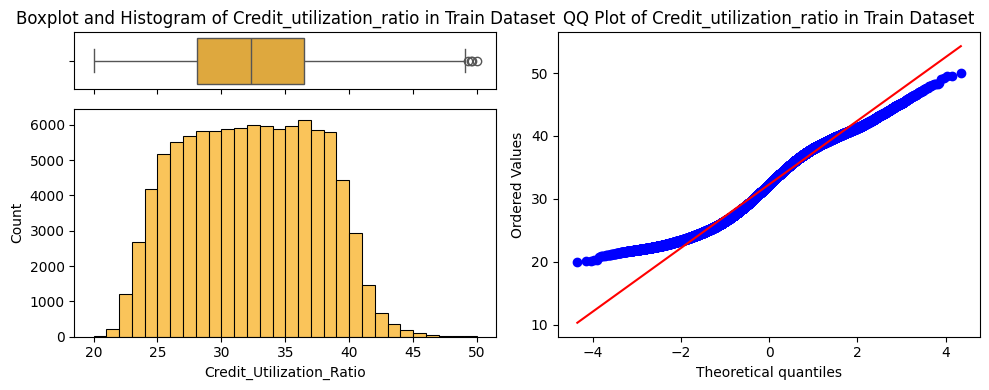

In [117]:
plotting_num_feature_distributions(df_train, 'Credit_Utilization_Ratio', dataset_name="Train Dataset")

,Delay_from_due_date
count,100000.000000
mean,21.068780
std,14.860104
min,-5.000000
25%,10.000000
50%,18.000000
75%,28.000000
max,67.000000


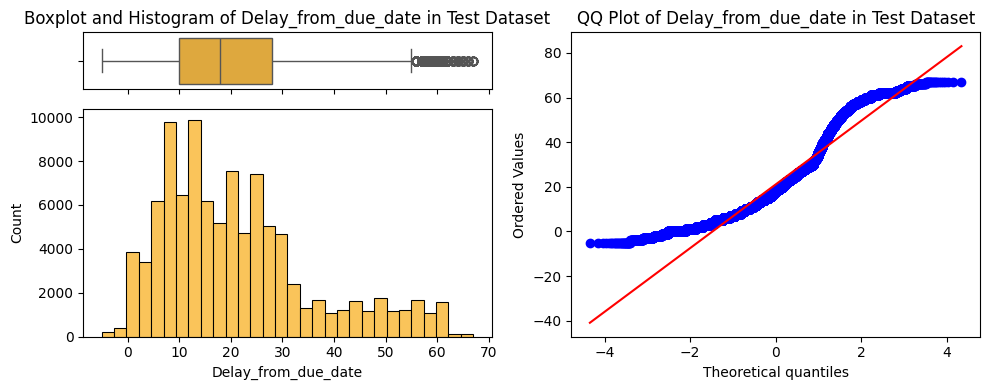

In [118]:
plotting_num_feature_distributions(df_train, 'Delay_from_due_date', dataset_name="Test Dataset")

,Monthly_Inhand_Salary
count,84998.000000
mean,4194.170850
std,3183.686167
min,303.645417
25%,1625.568229
50%,3093.745000
75%,5957.448333
max,15204.633333


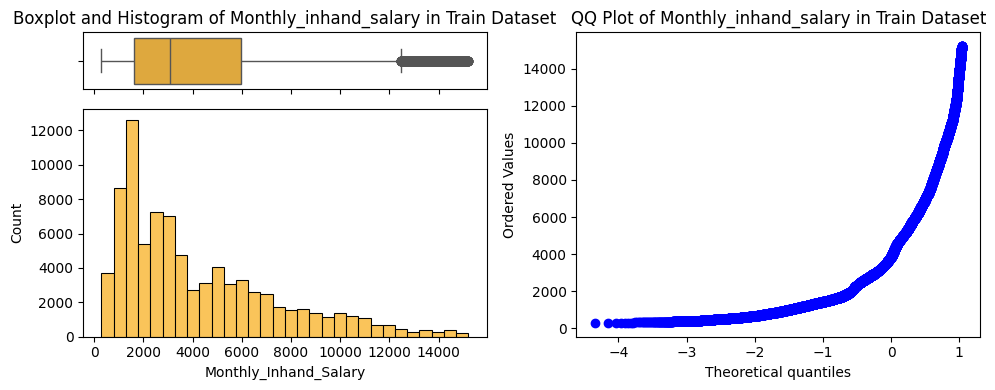

In [120]:
plotting_num_feature_distributions(df_train, 'Monthly_Inhand_Salary', dataset_name="Train Dataset")

,Payment_of_Min_Amount
count,100000
unique,3
top,Yes
freq,52326


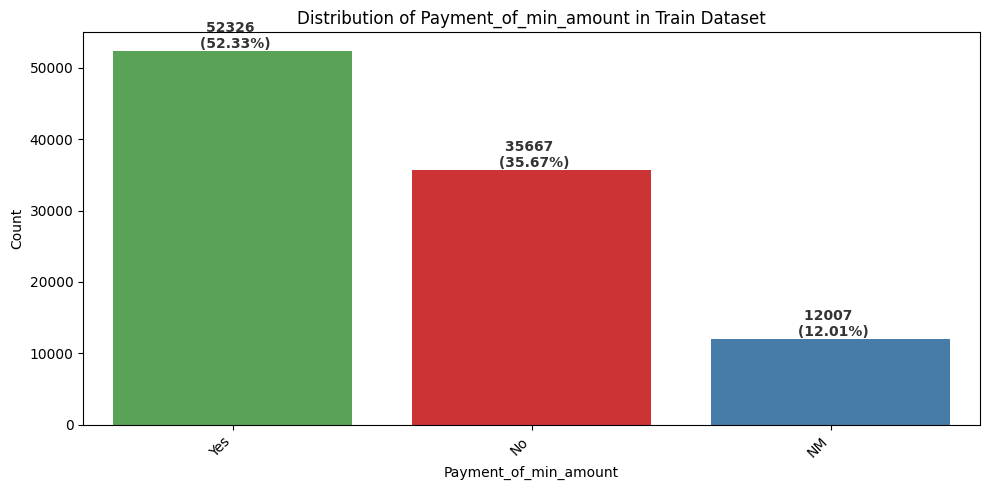

In [121]:
plotting_cat_feature_distributions(df_train, 'Payment_of_Min_Amount', dataset_name="Train Dataset")

### 3.2 Explore target variable

,Credit_Score
count,100000
unique,3
top,Standard
freq,53174


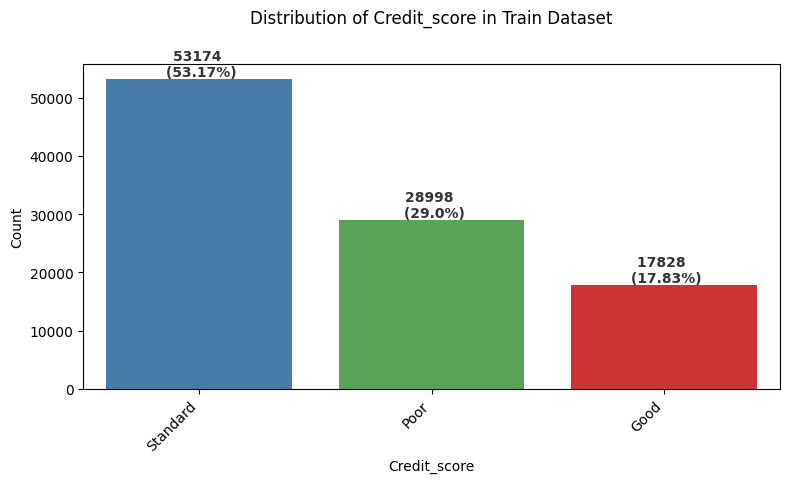

In [ ]:
plotting_cat_feature_distributions(df_train, 'Credit_Score', dataset_name="Train Dataset", title_margin=1.1)

## 4. Feature Selection

In [123]:
df_selection_train = df_train.copy()
df_selection_test = df_test.copy()

### 4.1 Feature Selection Approach `Spearman Correlation`

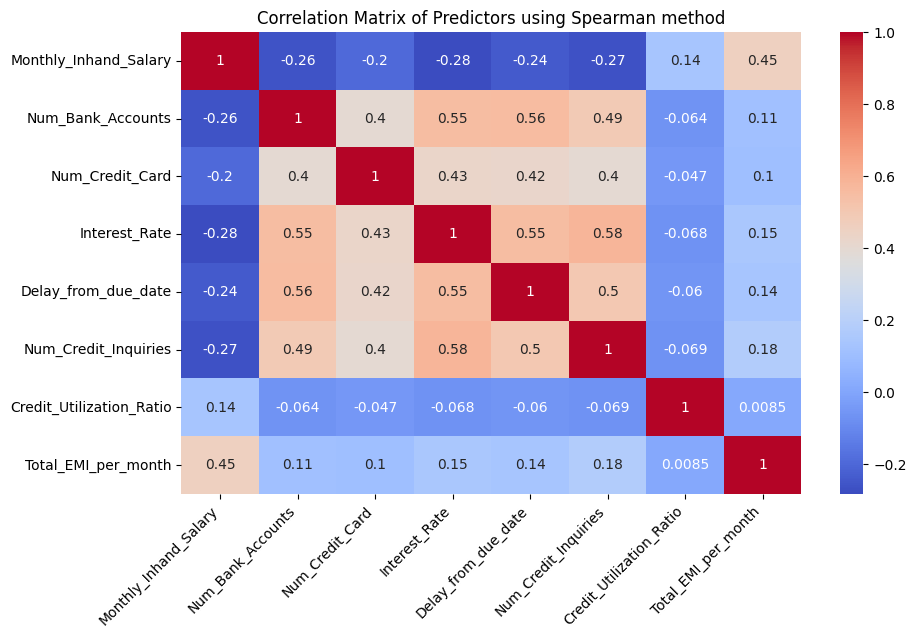

In [124]:
num_cols = df_selection_train.select_dtypes(include=['number']).columns.tolist()
corr = get_corr_of_predictors("spearman", df_selection_train, num_cols, width=10, height=6)

### 4.2 Final Selected Features

In [146]:
feature_list_train = df_selection_train.columns.tolist()
feature_list_test = df_selection_test.columns.tolist()


df_selection_train = df_selection_train[feature_list_train]
df_selection_test = df_selection_test[feature_list_test]

## 5. Data Preprocessing

In [282]:
df_cleaned_train = df_selection_train.copy()
df_cleaned_test = df_selection_test.copy()

### 5.1 Data Cleaning

#### 5.1.1 Removing unuseful Columns (Personal Data)

In [286]:
for dataset in [df_cleaned_train, df_cleaned_test]:
  del dataset['ID'] # Identification
  del dataset['Name'] # Name of client
  del dataset['SSN'] # SSN (social security number of a person)


#### 5.1.2 Rename columns for easy access

In [287]:
for dataset in [df_cleaned_train, df_cleaned_test]:
  dataset.columns = dataset.columns.str.lower()

  # Verificar
  print(dataset.columns)

Index(['customer_id', 'month', 'age', 'occupation', 'annual_income',
       'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card',
       'interest_rate', 'num_of_loan', 'type_of_loan', 'delay_from_due_date',
       'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')
Index(['customer_id', 'month', 'age', 'occupation', 'annual_income',
       'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card',
       'interest_rate', 'num_of_loan', 'type_of_loan', 'delay_from_due_date',
       'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount

#### 5.1.3 Cleaning Special Characters and Converting to Appropriate Data Types

In [288]:
cols_to_fix = ['age', 'annual_income', 'num_of_loan', 'num_of_delayed_payment', 'changed_credit_limit', 'amount_invested_monthly', 'outstanding_debt' , 'monthly_balance']

def clean_numeric_column(series):
    series = series.astype(str)
    series = series.str.strip("_")
    series = series.str.replace(r"[^0-9.]", "", regex=True)
    series = series.replace("", pd.NA)

    return pd.to_numeric(series, errors="coerce")


for col in cols_to_fix:
  df_cleaned_train[col] = clean_numeric_column(df_cleaned_train[col])

df_cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               100000 non-null  object 
 1   month                     100000 non-null  object 
 2   age                       100000 non-null  int64  
 3   occupation                100000 non-null  object 
 4   annual_income             100000 non-null  float64
 5   monthly_inhand_salary     84998 non-null   float64
 6   num_bank_accounts         100000 non-null  int64  
 7   num_credit_card           100000 non-null  int64  
 8   interest_rate             100000 non-null  int64  
 9   num_of_loan               100000 non-null  int64  
 10  type_of_loan              88592 non-null   object 
 11  delay_from_due_date       100000 non-null  int64  
 12  num_of_delayed_payment    92998 non-null   float64
 13  changed_credit_limit      97909 non-null   fl

#### 5.1.4 Fix negative values in `num_bank_accounts`

In [289]:
df_cleaned_train['num_bank_accounts'] = df_cleaned_train['num_bank_accounts'].apply(lambda x :abs (x))

#### 5.1.5 Fix negative zeros in `num_credit_card`

In [290]:
df_cleaned_train['num_credit_card'].replace(0,1,inplace=True)

#### 5.1.6 Converting `credit_history_age` to Total Months

In [291]:
def transform_credit(age):
    try:
        years = int("".join(re.findall('[0-9]',''.join(age.split("and")[0]))))
        month = int("".join(re.findall('[0-9]',''.join(age.split("and")[1]))))
        return years*12 + month
    except:
        return np.nan

df_cleaned_train['credit_history_age'] = df_cleaned_train['credit_history_age'].apply(transform_credit)

#### 5.1.7 Replace `NM` to `no` in `payment_of_min_amount` to standardizing payment status labels

In [292]:
df_cleaned_train['payment_of_min_amount'].replace("NM","No",inplace=True)

df_cleaned_train['payment_of_min_amount'].value_counts()

,count
payment_of_min_amount,
Yes,52326
No,47674


#### 5.1.8 Handling Invalid `payment_behaviour` Entries

In [293]:
df_cleaned_train['payment_behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [294]:
df_cleaned_train['payment_behaviour']= df_cleaned_train['payment_behaviour'].replace("!@9#%8",np.nan)

df_cleaned_train['payment_behaviour'].value_counts()

,count
payment_behaviour,
Low_spent_Small_value_payments,25513
High_spent_Medium_value_payments,17540
Low_spent_Medium_value_payments,13861
High_spent_Large_value_payments,13721
High_spent_Small_value_payments,11340
Low_spent_Large_value_payments,10425


#### 5.1.9 Handling Invalid `occupation` Entries

In [295]:
df_cleaned_train['occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [296]:
#create a maks by occupation that is equal to _______
occupation_mask = df_cleaned_train.loc[df_cleaned_train['occupation'] == '_______', 'occupation']
df_cleaned_train.loc[occupation_mask.index, 'occupation'] = np.nan

#### 5.1.10 Handling Invalid `credit_mix` Entries

In [297]:
df_cleaned_train['credit_mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [298]:
#create a mask by credit_mix that is equal to _
credit_mix_mask = df_cleaned_train.loc[df_cleaned_train['credit_mix'] == '_', 'credit_mix']
df_cleaned_train.loc[credit_mix_mask.index, 'credit_mix'] = np.nan

#### 5.1.10 Handling Missing Values

In [299]:
check_missing_values(df_cleaned_train, dataset_name="Train Dataset")

,column,missing_count,missing_percentage
0,credit_mix,20195,20.2%
1,monthly_inhand_salary,15002,15.0%
2,type_of_loan,11408,11.41%
3,credit_history_age,9030,9.03%
4,payment_behaviour,7600,7.6%
5,occupation,7062,7.06%
6,num_of_delayed_payment,7002,7.0%
7,amount_invested_monthly,4479,4.48%
8,changed_credit_limit,2091,2.09%
9,num_credit_inquiries,1965,1.96%


In [300]:
# Impute with KNN numerical values
num_cols = df_cleaned_train.select_dtypes(include=['number']).columns.tolist()
df_cleaned_train = impute_missing_values_knn(df_cleaned_train, num_cols, n_neighbors=5)

In [301]:
# Simple impute categorical values
cat_cols = ['payment_behaviour', 'type_of_loan', 'credit_mix', 'occupation']
df_cleaned_train = impute_missing_values_simple(df_cleaned_train, cat_cols)

In [302]:
check_missing_values(df_cleaned_train, dataset_name="Train Dataset")

'There are no missing values in the dataset.'

#### 5.1.11 Handling Outliers

In [303]:
for col in num_cols:
    outliers_indecies = detect_outliers(df_cleaned_train, 0, [col])
    median = df_cleaned_train[col].median()
    df_cleaned_train.loc[outliers_indecies, col] = median

In [304]:
df_cleaned_train.describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.338920,48046.898523,3973.647738,5.376360,5.521340,14.500450,3.510550,19.415900,13.341864,10.285905,5.784834,1249.626768,32.284481,221.331598,88.460579,154.696399,357.528053
std,10.619338,34706.155065,2862.374470,2.576858,2.045313,8.653109,2.395985,12.638937,6.169329,6.390728,3.817834,894.065229,5.115705,98.583723,80.086056,111.699068,139.199316
min,14.000000,7005.930000,303.645417,0.000000,1.000000,1.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,25.000000,19457.500000,1626.594167,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.380000,3.000000,566.072500,28.052567,146.000000,30.306660,75.639031,270.913865
50%,34.000000,37578.610000,3097.025000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.117500,32.305730,220.300000,69.248079,137.306996,338.671377
75%,41.000000,68655.405000,5691.490000,7.000000,7.000000,20.000000,5.000000,26.000000,18.000000,14.490000,8.000000,1602.940000,36.496036,300.000000,124.867635,192.534532,416.826250
max,56.000000,152574.760000,12395.060000,11.000000,11.000000,34.000000,9.000000,55.000000,29.800000,28.940000,17.000000,4014.350000,49.064277,404.000000,357.406068,563.921472,790.041321


### 5.2. Feature Engineering

In [305]:
df_eng_train = df_cleaned_train.copy()
df_eng_test = df_cleaned_test.copy()

Create a type_of_loan to has_loan_x

In [306]:
for i in df_eng_train['type_of_loan'].value_counts().head(9).index[1:]:
    clean_name = i.lower().replace(" ", "_")
    df_eng_train[clean_name] = df_eng_train['type_of_loan'].str.contains(i)

del df_eng_train['type_of_loan']

In [309]:
df_eng_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               100000 non-null  object 
 1   month                     100000 non-null  object 
 2   age                       100000 non-null  int64  
 3   occupation                100000 non-null  object 
 4   annual_income             100000 non-null  float64
 5   monthly_inhand_salary     100000 non-null  float64
 6   num_bank_accounts         100000 non-null  int64  
 7   num_credit_card           100000 non-null  int64  
 8   interest_rate             100000 non-null  int64  
 9   num_of_loan               100000 non-null  int64  
 10  delay_from_due_date       100000 non-null  int64  
 11  num_of_delayed_payment    100000 non-null  float64
 12  changed_credit_limit      100000 non-null  float64
 13  num_credit_inquiries      100000 non-null  fl

### 5.3 Data Transformation

## 6. Data Modeling

### 6.1 Generate Predictions with Baseline Model

### 6.2 Assess the Baseline Model

## 7. Model Evaluation

### 7.1 Generate Predictions with Model Selected

### 7.2 Assess the Selected Model

## 8. Insights and Conclusions